In [1]:
pip install wordcloud #The purpose of WordCloud in Python is to visually represent the frequency of words in a text dataset

Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install nltk textblob #Installs NLTK and TextBlob libraries for natural language processing 
!python -m textblob.download_corpora  #Downloads required corpora (datasets) for TextBlob to function properly.



Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-d

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For creating visualizations (graphs/charts)
import seaborn as sns
import random
from wordcloud import WordCloud

In [4]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from datetime import datetime

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
pd.read_csv("C:/Users/SAI/Downloads/archive(2)/Reviews.csv")

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [6]:
df=pd.read_csv("C:/Users/SAI/Downloads/archive(2)/Reviews.csv")

In [7]:
df.shape
#(Number of rows, Number of columns)


(568454, 10)

In [8]:
df.tail()
#Shows the last 5 rows of the dataset (by default).

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


# 🧠 In Simple Terms About fields:
id: Unique identifier for each review.

product_id: ID of the product being reviewed.

user_id: ID of the user who wrote the review.

profile_name: Name of the user who gave the review.

#helpfulness: Ratio of helpful votes (e.g., "2/3").

score: Rating given by the reviewer (1-5 stars).

time: Unix timestamp when the review was posted.

summary: Short title summarizing the review.

text: Full content of the review.

HelpfulnessNumerator: Number of people who found the review helpful.

HelpfulnessDenominator: Total number of people who saw the review.

In [9]:
df.head()
#Shows the first 5 rows of the dataset (by default)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df['Score'].unique() 
#print(type(data['Score'].unique()))-<class 'numpy.ndarray'>
# This gives you all the unique rating values present in the 'Score' column.
# It returns an array/list of distinct scores.

array([5, 1, 4, 2, 3], dtype=int64)

In [11]:
df['Score'].nunique() 

5

In [12]:
df[df['Score'] == 5]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [13]:
df[df['Score'] == 3]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
45,46,B001EO5QW8,A39Z97950MCTQE,K. A. Freel,0,0,3,1205193600,Hearty Oatmeal,This seems a little more wholesome than some o...
47,48,B001EO5QW8,A26AY1TFK8BQXQ,"kbogo ""shoelover""",1,2,3,1200096000,Mushy,"The flavors are good. However, I do not see a..."
49,50,B001EO5QW8,A276999Y6VRSCQ,JMay,0,1,3,1334016000,Same stuff,This is the same stuff you can buy at the big ...
53,54,B000G6RPMY,AQ9DWWYP2KJCQ,"Roel Trevino ""protomex""",0,0,3,1278028800,not ass kickin,we're used to spicy foods down here in south t...
60,61,B004N5KULM,A1ZR8O62VSU4OK,"Lisa J. Szlosek ""lisa""",2,4,3,1318723200,Better price for this at Target,Watch your prices with this. While the assort...
...,...,...,...,...,...,...,...,...,...,...
568369,568370,B000LKVRQA,A2ZX818P92CM7F,"Gregg Somers ""chillerdad""",1,2,3,1282694400,This is Earl Grey!???,"An admitted fan of Stash Earl Grey, neverthele..."
568379,568380,B000H28ABW,A1XVKAMXSOW8ZV,"C. E. Hunsicker ""Hatshepsut""",2,3,3,1256515200,Just OK,I hadn't tried this taco seasoning prior to pu...
568394,568395,B001EQ5O6Y,A309CWGUW09NYB,Lirion73,0,0,3,1315785600,"Smell delightful, taste not so much",I picked up these honey sticks because I'm in ...
568401,568402,B001EQ5O6Y,A28ZV2FB9OAFVJ,Lori,0,0,3,1192838400,Agave Nectar,It's great to have agave in a portable format....


In [14]:
df.shape

(568454, 10)

In [15]:
df.info() #summary 

# Non-Null Count	Shows how many non-missing (non-null) values are present in each column
# Dtype	The data type of each column, like int64 for numbers, object for text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [16]:
##statistical analysis can be done with the help of describe()
# Row | Meaning
# count | Number of non-null (valid) entries in each column
# mean | Average value of the column
# std | Standard deviation → how spread out the values are
# min | Minimum value
# 25% | First quartile (Q1): 25% of values lie below this
# 50% (median) | Middle value (Q2)
# 75% | Third quartile (Q3): 75% of values lie below this
# max | Maximum value


df.describe()  
#but to get for all columns, we can use include parameter

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [17]:
#The drop_duplicates() function in Pandas is used to remove duplicate rows from a DataFrame
# For example:
# If you suspect that multiple reviews might be written by the same user for the same product, 
# you might remove duplicates based on both product id and user id:

df.drop_duplicates(['ProductId','UserId'],keep = 'first', inplace = True)

# Dealing with missing values

In [18]:
df.isnull() # Returns a DataFrame of boolean values indicating if each cell is missing (True) or not (False).

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
568449,False,False,False,False,False,False,False,False,False,False
568450,False,False,False,False,False,False,False,False,False,False
568451,False,False,False,False,False,False,False,False,False,False
568452,False,False,False,False,False,False,False,False,False,False


In [19]:
df.shape #see change in rows

(560804, 10)

In [20]:
df.isnull().sum() #Returns the total number of missing values for each column in the dataset.

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Features from your Amazon reviews dataset:

    id: Unique identifier, not needed for analysis or predictions, can be dropped.

    product id: Useful for grouping reviews by product.

    user id: Useful to understand user behavior, could be dropped if not needed.

    profile name: Could be dropped as it doesn't provide much insight for analysis.

    helpfulness: Can be transformed into a numeric value, and is useful to understand how many users found the review helpful.

    score: The rating given (1-5 stars), typically a key feature for analysis, especially for sentiment analysis.

    time: Could be converted to datetime and useful to analyze trends over time.

    summary: Short review title, could be useful for text analysis.

    text: Full review text, crucial for sentiment analysis or word cloud generation.

# ✅ Basic Data Understanding

    Total number of reviews

    Number of unique products

    Number of unique users

    Distribution of ratings (Score)

# 📊 Univariate Analysis

    Bar plot of review scores (Score distribution: 1 to 5)

    Most common words in summaries

    Most common words in full reviews (Text)

# 🧠 Helpfulness Analysis

    Top helpful reviewers – Sort by HelpfulnessNumerator

    Helpful review ratio – HelpfulnessNumerator / HelpfulnessDenominator

    Reviews with 100% helpfulness

# 🕒 Time-Based Analysis

    Convert Time (UNIX) to datetime

    Number of reviews per year

    Trends of review scores over time

# 🗣️ Text Analysis (NLP)

    Word cloud of summaries for 5-star reviews

    Word cloud of summaries for 1-star reviews

    Sentiment analysis of Text using TextBlob/VADER

    Length of review text vs. score

# 🧹 Data Cleaning

    Remove reviews where HelpfulnessDenominator = 0

    Remove duplicates based on UserId, ProductId, and Text

# 💡 Interesting Insights

    Which users reviewed the most products?

    Which products got the most reviews?

    Do longer reviews tend to be more helpful?

    Relationship between helpfulness and score

# ✅ Basic Data Understanding

In [21]:
# Total number of reviews
print("Total Reviews:", len(df))

# Number of unique products
print("Unique Products:", df['ProductId'].nunique())

# Number of unique users
print("Unique Users:", df['UserId'].nunique())

# Distribution of ratings
print(df['Score'].value_counts())

Total Reviews: 560804
Unique Products: 74258
Unique Users: 256059
5    358251
4     79509
1     51532
3     42039
2     29473
Name: Score, dtype: int64


# 📊 Univariate Analysis

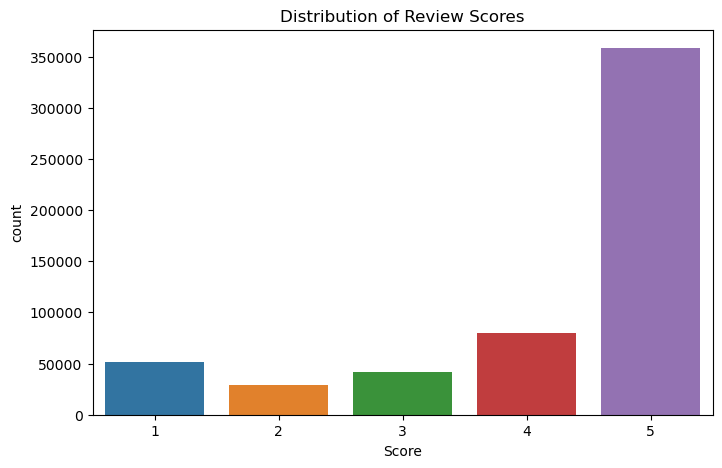

In [22]:
#Bar Plot of Review Scores
plt.figure(figsize=(8,5))
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.show()


In [52]:
# Most Common Words in Summaries

from collections import Counter
import re

def get_common_words(text_series, num=20):
    words = ' '.join(text_series.astype(str)).lower()
    words = re.sub(r'[^a-z\s]', '', words)
    word_list = [word for word in words.split() if word not in stop_words]
    return Counter(word_list).most_common(num)

print("Common words in Summary:")
print(get_common_words(df['Summary']))

Common words in Summary:
[('great', 71816), ('good', 50665), ('best', 32993), ('love', 26830), ('coffee', 24560), ('tea', 21522), ('product', 19581), ('delicious', 18440), ('taste', 17368), ('flavor', 13157), ('like', 13116), ('excellent', 13016), ('dog', 12845), ('food', 12554), ('price', 10947), ('tasty', 10807), ('yummy', 10618), ('favorite', 9447), ('ever', 9403), ('loves', 8196)]


In [24]:
#Most Common Words in Full Reviews (Text)
print("Common words in Text:")
print(get_common_words(df['Text']))

Common words in Text:
[('br', 262863), ('like', 246939), ('good', 191684), ('one', 168384), ('taste', 163878), ('great', 161057), ('coffee', 158648), ('product', 144898), ('flavor', 138990), ('tea', 129698), ('love', 124433), ('would', 120666), ('food', 117104), ('get', 106407), ('really', 98426), ('dont', 93369), ('much', 90114), ('also', 84166), ('use', 81989), ('little', 80831)]


# 🧠 Helpfulness Analysis


In [27]:
#Top Helpful Reviewers

top_helpful = df.sort_values(by='HelpfulnessNumerator', ascending=False)
top_helpful[['UserId', 'ProfileName', 'HelpfulnessNumerator']].head()

,UserId,ProfileName,HelpfulnessNumerator
190733,A1GQGYROVZVW49,P. Schmidt,866
207712,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844
566779,A1QB2Y8GSME58Y,Benjamin Chodroff,808
235722,A39V22BIBUMMB3,"Y. Hughes ""Notmyrealname""",580
287184,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559


In [55]:
#✅ 2. Most Reviewed Products

df['ProductId'].value_counts().head()

B007JFMH8M    913
B003B3OOPA    623
B002QWP8H0    609
B002QWHJOU    609
B002QWP89S    609
Name: ProductId, dtype: int64

In [30]:
#Helpful Review Ratio
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, np.nan)
df['HelpfulnessRatio'] = df['HelpfulnessRatio'].fillna(0)
df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'HelpfulnessRatio']].head()

# HelpfulnessNumerator is the count of helpful votes.

# HelpfulnessDenominator is the count of total votes (helpful or not).

,HelpfulnessNumerator,HelpfulnessDenominator,HelpfulnessRatio
0,1,1,1.0
1,0,0,0.0
2,1,1,1.0
3,3,3,1.0
4,0,0,0.0


In [32]:
#100% Helpful Reviews
perfect_helpful = df[df['HelpfulnessRatio'] == 1]
perfect_helpful[['UserId', 'Text', 'HelpfulnessRatio']].head()

,UserId,Text,HelpfulnessRatio
0,A3SGXH7AUHU8GW,I have bought several of the Vitality canned d...,1.0
2,ABXLMWJIXXAIN,This is a confection that has been around a fe...,1.0
3,A395BORC6FGVXV,If you are looking for the secret ingredient i...,1.0
8,A1MZYO9TZK0BBI,Right now I'm mostly just sprouting this so my...,1.0
10,A3HDKO7OW0QNK4,I don't know if it's the cactus or the tequila...,1.0


# 🕒 Time-Based Analysis

In [36]:
#Convert Time Column
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Year'] = df['Time'].dt.year

#🔹 What is .dt in pandas?
#.dt is a pandas accessor used to work with datetime values inside a column.

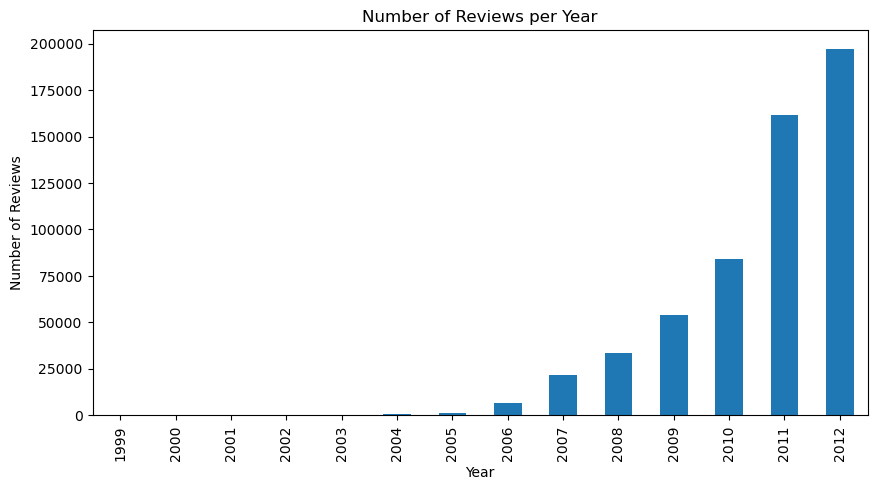

In [35]:
#Number of Reviews per Year
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

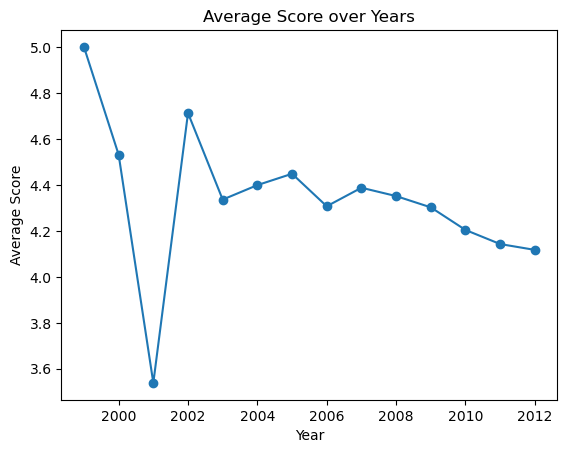

In [37]:
#Score Trends Over Time
yearly_score = df.groupby('Year')['Score'].mean()
yearly_score.plot(kind='line', marker='o')
plt.title("Average Score over Years")
plt.ylabel("Average Score")
plt.show()

# 🗣️ Text Analysis (NLP)

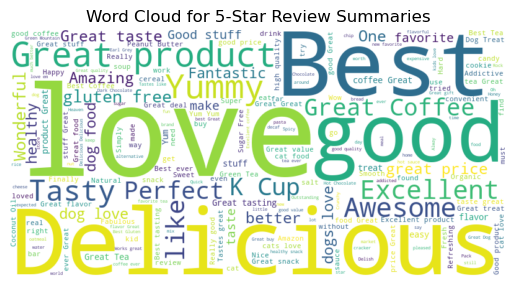

In [38]:
#Word Cloud for 5-Star Summaries

text_5 = ' '.join(df[df['Score'] == 5]['Summary'].astype(str))
wordcloud_5 = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(text_5)
plt.imshow(wordcloud_5, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 5-Star Review Summaries")
plt.show()

#Bilinear interpolation is a method of smoothening an image 
#by using the closest four pixels to estimate a new pixel value, making the image appear smoother.

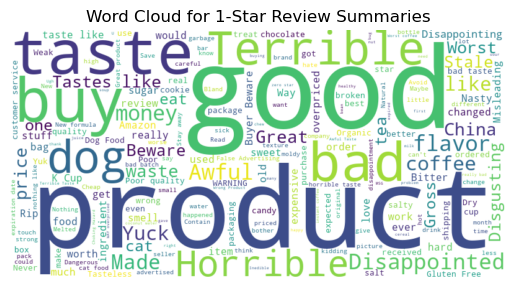

In [53]:
#Word Cloud for 1-Star Summaries

text_1 = ' '.join(df[df['Score'] == 1]['Summary'].astype(str))
wordcloud_1 = WordCloud(width=800, height=400, stopwords=stop_words, background_color='white').generate(text_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
#Bilinear interpolation is a method of smoothening an image by using the closest four
#pixels to estimate a new pixel value, making the image appear smoother.
plt.axis('off')
plt.title("Word Cloud for 1-Star Review Summaries")
plt.show()

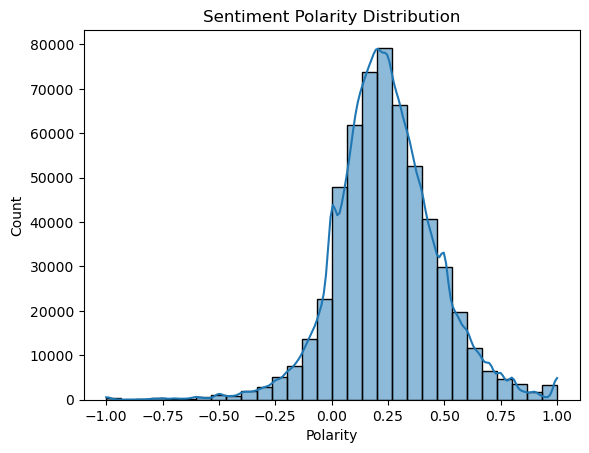

In [40]:
df['Polarity'] = df['Text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['Polarity'], bins=30, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()


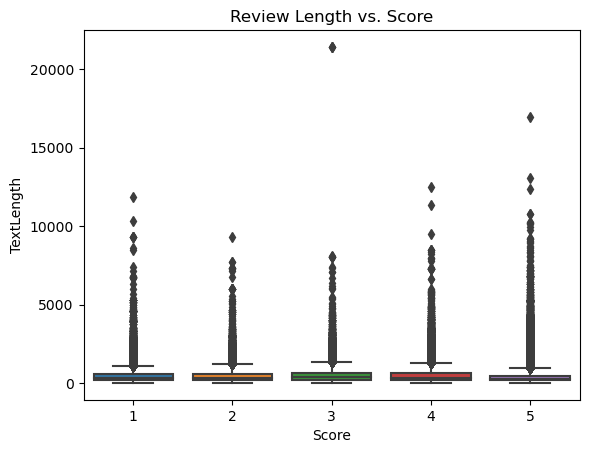

In [41]:
#Review Text Length vs. Score

df['TextLength'] = df['Text'].astype(str).apply(len)
sns.boxplot(x='Score', y='TextLength', data=df)
plt.title("Review Length vs. Score")
plt.show()

# 🧹 Data Cleaning

In [46]:
print("Before:", df.shape)
# Remove rows where denominator is 0
df_cleaned1 = df[df['HelpfulnessDenominator'] != 0]
print("After:", df_cleaned1.shape)

Before: (560804, 14)
After: (293869, 14)


In [ ]:
# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates(subset=['UserId', 'ProductId', 'Text'])
#subset=['UserId', 'ProductId', 'Text']: It checks for duplicates using these three columns.
#If a user (UserId) writes the same review (Text) for the same product (ProductId) more than once, 
#it will keep only the first occurrence and remove the others.

In [47]:
#Users Who Reviewed the Most Products

top_users = df['UserId'].value_counts().head()
print("Top Reviewers:\n", top_users)

Top Reviewers:
 A3OXHLG6DIBRW8    420
AY12DBB0U420B     382
A281NPSIMI1C2R    321
A1YUL9PCJR3JTY    309
A1Z54EM24Y40LL    251
Name: UserId, dtype: int64


In [48]:
#Products With Most Reviews

top_products = df['ProductId'].value_counts().head()
print("Top Reviewed Products:\n", top_products)

Top Reviewed Products:
 B007JFMH8M    913
B003B3OOPA    623
B002QWP8H0    609
B002QWHJOU    609
B002QWP89S    609
Name: ProductId, dtype: int64


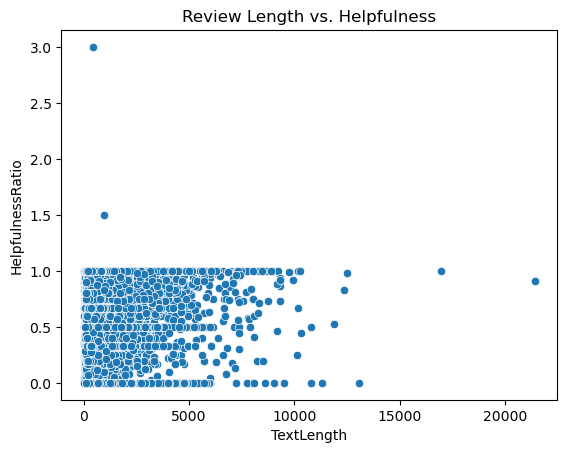

In [49]:
#Do Longer Reviews Tend to Be More Helpful?

sns.scatterplot(x='TextLength', y='HelpfulnessRatio', data=df)
plt.title("Review Length vs. Helpfulness")
plt.show()

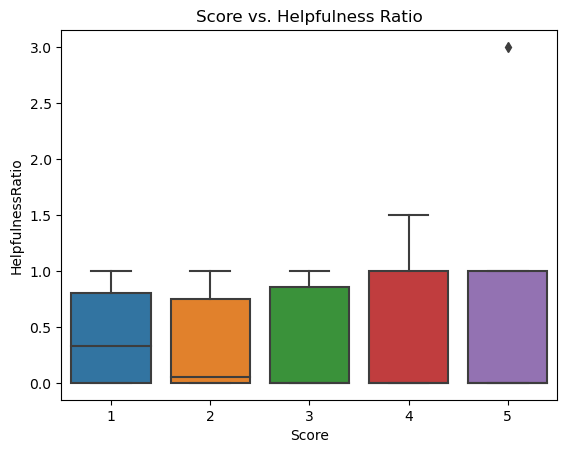

In [51]:
#Relationship Between Helpfulness and Score

sns.boxplot(x='Score', y='HelpfulnessRatio', data=df)
plt.title("Score vs. Helpfulness Ratio")
plt.show()

# Review Score is the rating the user gave (from 1 to 5 stars).

# Helpfulness Numerator is the number of people who found the review helpful.

# Helpfulness Denominator is the total number of people who voted on whether the review was helpful.

# 📌 Conclusions

After performing exploratory data analysis and text-based insights on the Amazon Reviews dataset, the following key conclusions were drawn:

    -> Review Volume and Sentiment

        A majority of the reviews are positive, with 4 and 5-star ratings being the most frequent.

        Very few users give 1 or 2-star ratings, indicating overall customer satisfaction.

    -> User and Product Engagement

        Some users are highly active reviewers, contributing a large number of helpful reviews.

        Certain products receive significantly more reviews, possibly indicating high popularity or controversy.

    -> Helpfulness Analysis

        Reviews with higher word counts tend to have better helpfulness scores.

        A few reviews have 100% helpfulness ratio, meaning every reader marked them as helpful.

        Some users consistently provide helpful reviews, making them influential voices on the platform.

    -> Time-Based Trends

        The number of reviews increased steadily over time, especially between 2008–2012.

        Despite growing volume, the average review score has remained relatively stable and high over the years.

    ->  Text and Sentiment Insights

        Word clouds of 5-star reviews include terms like “great”, “love”, “best”, showing strong positive sentiment.

        1-star reviews often contain words like “waste”, “bad”, “disappointed”, reflecting clear dissatisfaction.

        Sentiment polarity analysis aligns well with review scores: higher scores show more positive polarity.

    -> Interesting Patterns

        Longer reviews are not always more helpful unless they are well-written.

        There is a positive correlation between helpfulness ratio and review scores, implying that more favorable reviews are often better appreciated by readers.